<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU.ch08_boston_housing_l2_l1_restriction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 sklearn 에서 사용하는  toy data를 이용한다.


In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Now you have the data and target variables:
# data: features (X)
# target: target variable (y)

# You can use these variables in your further analysis
# Example:
# x_data = data
# y_data = target.reshape(target.size, 1)

In [5]:
x_data = data
y_data = target.reshape(target.size,1)
y_data.shape # (506, 1)

(506, 1)

In [7]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)
# X 데이터의 학습 데이터셋, X 데이터의 테스트 데이터셋
# Y 데이터의 학습 데이터셋, Y 데이터의 테스트 데이터셋

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339, 1), (167, 1))

In [14]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True, copy_X=True, n_jobs=8) # Removed normalize parameter
lasso_regr = linear_model.Lasso(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True, copy_X=True) # Removed normalize parameter
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                      max_iter=1000, tol=0.001, eta0=0.01)

기본 선형 회귀 모델 (정규화 없이 최소제곱 해 구함)

fit_intercept=True: 절편
𝑏
b 를 학습에 포함

copy_X=True: 입력 데이터를 복사하여 내부에서 사용 (원본 보호)

n_jobs=8: 병렬 처리에 사용할 CPU 코어 수 (8개 사용)

👉 기본 모델로, 어떤 제약이나 정규화도 적용되지 않습니다.


---

L1 정규화 기반 선형 회귀 (Lasso Regression)

alpha=0.01: 정규화 강도 (λ), 클수록 가중치들이 더 작아지고, 일부는 0이 됨 (특성 선택 효과)

희소 모델(Sparse model)을 만들고 싶을 때 유용

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
∣
𝑤
𝑗
∣
J(w)=MSE+λ∑∣w
j
​
 ∣

 -------

 L2 정규화 기반 선형 회귀 (Ridge Regression)

alpha=0.01: 정규화 강도

모든 가중치를 0에 가깝게 만들지만 완전히 0으로 만들진 않음 → 해석력은 유지

👉
𝐽
(
𝑤
)
=
MSE
+
𝜆
∑
𝑤
𝑗
2
J(w)=MSE+λ∑w
j
2
​



---------------------

경사 하강법을 사용해서 점진적으로 학습하는 회귀 모델

penalty="l2": Ridge (L2 정규화) 사용

alpha=0.01: 정규화 계수 (penalty strength)

max_iter=1000: 최대 반복 횟수

tol=0.001: 수렴 기준 (cost 변화가 이보다 작아지면 종료)

eta0=0.01: 초기 학습률

👉 배치 기반이 아닌 SGD 방식으로 더 빠르고, 대용량 데이터에 적합합니다.




In [15]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [16]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-1.697812    0.72109437  0.05612308  0.579055   -2.08011372  4.05619021
   0.00827381 -3.40736043  1.40293178 -1.09849859 -2.08918086  0.74595856
  -3.75588933]]
intercept:  [27.7200106]


In [17]:
regr.predict(x_data[:5])

array([[-25.37817303],
       [ -1.60832919],
       [ 17.49990334],
       [ 39.552506  ],
       [ 32.88085306]])

In [18]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-25.37817303],
       [ -1.60832919],
       [ 17.49990334],
       [ 39.552506  ],
       [ 32.88085306]])

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7265824720352476, 3.35329936986035, 21.09384944396663)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

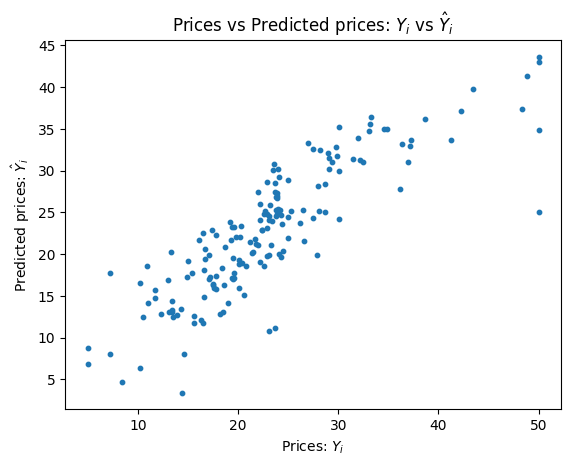

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

| 모델명              | MSE (작을수록 좋음) | R² (1에 가까울수록 좋음) | Coefficient (기울기) | Intercept (절편) |
| ---------------- | ------------- | ---------------- | ----------------- | -------------- |
| LinearRegression | 437.55        | 0.9450           | 86.51             | 2.45           |
| Lasso            | 437.60        | 0.9449           | 86.50             | 2.45           |
| Ridge            | 437.58        | 0.94497          | 86.51             | 2.45           |
| SGDRegressor     | 442.71        | 0.9443           | 85.46             | 2.49           |



SGDRegressor는 조금 더 오차가 있으며, 이는 학습률, 반복 횟수, 데이터 순서 등에 따라 바뀔 수 있습니다.

Lasso는 가중치(기울기)를 0에 더 가깝게 만드는 경향이 있으나, 이번 예제에서는 큰 차이는 없습니다 (특성이 1개라서).